In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
campaign = pd.read_csv('data/geowiki/ILUC_DARE_x_y/ILUC_DARE_campaign_x_y.csv')
controls = pd.read_csv('data/geowiki/ILUC_DARE_x_y/ILUC_DARE_controls_x_y.csv')


In [74]:
campaign_gdf = gpd.GeoDataFrame(campaign,
                     geometry=gpd.points_from_xy(campaign.x, campaign.y))

controls_gdf = gpd.GeoDataFrame(controls,
                     geometry=gpd.points_from_xy(controls.x, controls.y))                    

In [75]:
controls_gdf.loc[controls_gdf.step == 'step1']

,sampleid,legendid,step,name,answer,x,y,geometry
1,1740347,298,step1,Please select the predominant tree loss driver...,Subsistence agriculture,122.612326,9.604870,POINT (122.61233 9.60487)
5,1739108,298,step1,Please select the predominant tree loss driver...,Pasture,-37.796241,-12.070579,POINT (-37.79624 -12.07058)
6,1739666,298,step1,Please select the predominant tree loss driver...,Other natural disturbances/No tree-loss driver,-4.262132,9.700092,POINT (-4.26213 9.70009)
9,1739063,298,step1,Please select the predominant tree loss driver...,Subsistence agriculture,-51.525194,-26.045670,POINT (-51.52519 -26.04567)
13,1738129,298,step1,Please select the predominant tree loss driver...,Subsistence agriculture,90.594572,25.690104,POINT (90.59457 25.69010)
...,...,...,...,...,...,...,...,...
6144,1741075,298,step1,Please select the predominant tree loss driver...,Pasture,-70.200270,8.145108,POINT (-70.20027 8.14511)
6145,1739715,298,step1,Please select the predominant tree loss driver...,Managed forest/forestry,-84.427788,29.952610,POINT (-84.42779 29.95261)
6150,1739505,298,step1,Please select the predominant tree loss driver...,Pasture,-51.503634,-9.209445,POINT (-51.50363 -9.20945)
6153,1739129,298,step1,Please select the predominant tree loss driver...,Subsistence agriculture,104.939769,16.243420,POINT (104.93977 16.24342)


In [76]:
controls_gdf.loc[controls_gdf.step == 'step1'].answer.unique()

array(['Subsistence agriculture', 'Pasture',
       'Other natural disturbances/No tree-loss driver',
       'Managed forest/forestry', 'Commercial agriculture',
       'Roads/trails/buildings',
       'Commercial oil palm or other palm plantations',
       'Mining and crude oil extraction', 'Wildfire (disturbance)'],
      dtype=object)

In [77]:
campaign_gdf.loc[campaign_gdf.step == 'step1'].answer.unique()

array(['Subsistence agriculture', 'Managed forest/forestry', 'Pasture',
       'Roads/trails/buildings',
       'Other natural disturbances/No tree-loss driver',
       'Commercial agriculture', 'Wildfire (disturbance)',
       'Commercial oil palm or other palm plantations',
       'Mining and crude oil extraction'], dtype=object)

In [78]:
np.unique(campaign_gdf.loc[campaign_gdf.step == 'step1'].answer, return_counts=True)

(array(['Commercial agriculture',
        'Commercial oil palm or other palm plantations',
        'Managed forest/forestry', 'Mining and crude oil extraction',
        'Other natural disturbances/No tree-loss driver', 'Pasture',
        'Roads/trails/buildings', 'Subsistence agriculture',
        'Wildfire (disturbance)'], dtype=object),
 array([ 17595,  17345,  41849,   1076,  20394,  62034,   6137, 214748,
          2010]))

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

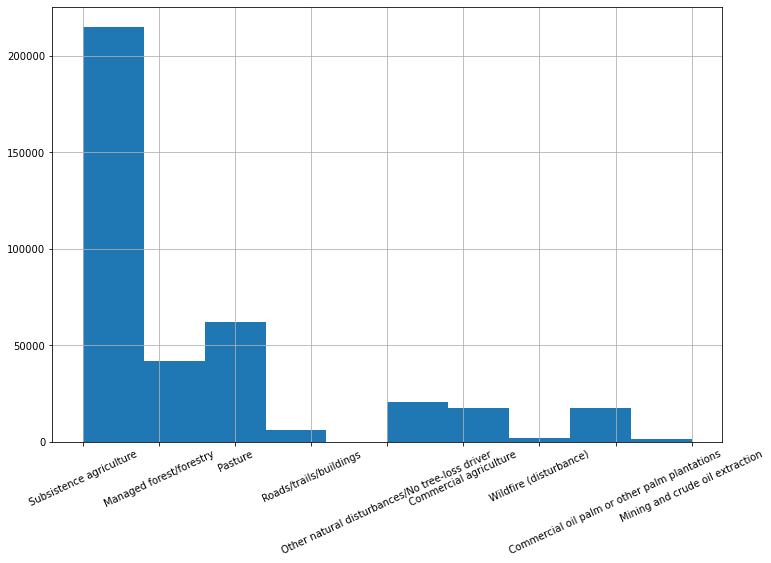

In [17]:
#The dataset is highly unbalanced


campaign_gdf.loc[campaign_gdf.step == 'step1'].answer.hist(figsize=(12,8))
plt.xticks(rotation=25)

Text(0.5, 1.0, "Distribution of classes in 'controls' part of the geo-wiki dataset")

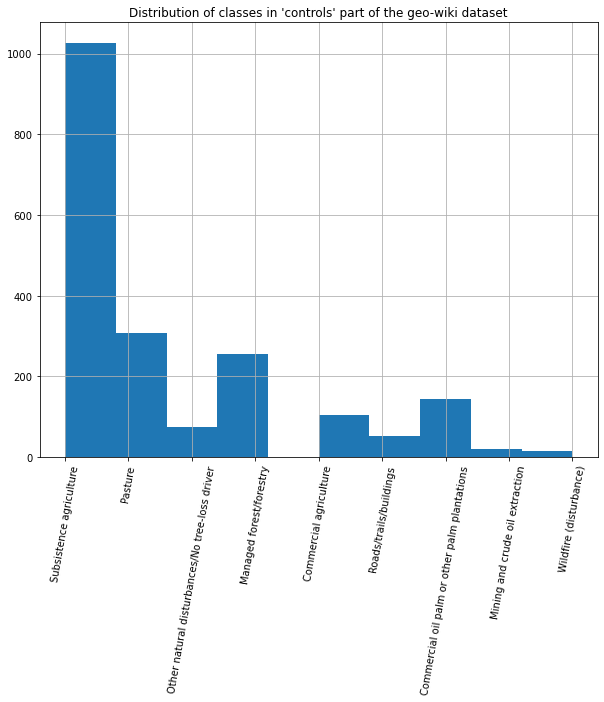

In [24]:

controls_gdf.loc[controls_gdf.step == 'step1'].answer.hist(figsize=(10,8))
plt.xticks(rotation=80)
plt.title("Distribution of classes in 'controls' part of the geo-wiki dataset")

In [20]:
np.unique(controls_gdf.loc[controls_gdf.step == 'step1'].answer, return_counts=True)

(array(['Commercial agriculture',
        'Commercial oil palm or other palm plantations',
        'Managed forest/forestry', 'Mining and crude oil extraction',
        'Other natural disturbances/No tree-loss driver', 'Pasture',
        'Roads/trails/buildings', 'Subsistence agriculture',
        'Wildfire (disturbance)'], dtype=object),
 array([ 104,  143,  255,   20,   76,  308,   53, 1026,   16]))

In this section, I look at how often there are different answers for one location

In [80]:
main_driver = campaign_gdf.loc[campaign_gdf.step == 'step1']

In [81]:
main_driver = main_driver.drop(['legendid', 'samplegroupid', 'viewed_ge', 'qual_score', 'used_basemap', 'rank_final', 'comm', 'comments', 'submissionid', 'sampleid', 'timestamp', 'skip', 'submission_itemid', 'score_ctrl', 'addedpts'], axis=1)
main_driver

,userid,step,name,answer,rank_ini,rqs,newqs,x,y,geometry
2,21900,step1,Please select the predominant tree loss driver...,Subsistence agriculture,17.0,0.82,37583.0,97.923927,26.256042,POINT (97.92393 26.25604)
5,21576,step1,Please select the predominant tree loss driver...,Subsistence agriculture,10.0,0.71,28776.0,107.481103,15.599328,POINT (107.48110 15.59933)
8,21900,step1,Please select the predominant tree loss driver...,Managed forest/forestry,17.0,0.82,37583.0,107.481103,15.599328,POINT (107.48110 15.59933)
11,21912,step1,Please select the predominant tree loss driver...,Subsistence agriculture,12.0,0.88,45805.0,107.481103,15.599328,POINT (107.48110 15.59933)
14,15296,step1,Please select the predominant tree loss driver...,Subsistence agriculture,9.0,0.83,56048.0,2.058415,10.523847,POINT (2.05841 10.52385)
...,...,...,...,...,...,...,...,...,...,...
1158005,19505,step1,Please select the predominant tree loss driver...,Subsistence agriculture,5.0,0.81,70025.0,99.490589,16.945004,POINT (99.49059 16.94500)
1158008,20326,step1,Please select the predominant tree loss driver...,Subsistence agriculture,2.0,0.83,120011.0,99.490589,16.945004,POINT (99.49059 16.94500)
1158012,2263,step1,Please select the predominant tree loss driver...,Subsistence agriculture,32.0,0.64,2021.0,28.855159,-13.521358,POINT (28.85516 -13.52136)
1158015,2263,step1,Please select the predominant tree loss driver...,Subsistence agriculture,32.0,0.64,2021.0,28.855159,-13.521358,POINT (28.85516 -13.52136)


In [83]:
main_driver['wkb'] = main_driver.geometry.to_wkb()

groups_count = 0
drivers = 0

for name, group in main_driver.groupby(main_driver.wkb):
    groups_count += 1
    drivers += np.unique(group.answer).shape[0]
    
print("Average number of drivers based on the 3 answers: ", drivers/groups_count)
    

Average number of drivers based on the 3 answers:  1.6064262994162677


In [84]:
groups_count = 0
one = 0
two = 0
three = 0
other = 0

for name, group in main_driver.groupby(main_driver.wkb):
    groups_count += 1

    unique = np.unique(group.answer).shape[0]

    if unique == 1:
        one += 1
    elif unique == 2:
        two += 1
    elif unique == 3:
        three += 1
    else:
        _group = group
        #other += 1
        raise ValueError(f"Unique value: {unique}")     
    #print("Average number of drivers based on the 3 answers: ", drivers/groups_count)


print(one/groups_count) 
print(two/groups_count)   
print(three/groups_count)     
print(one, two, three, other)

ValueError: Unique value: 5

In [85]:
lengths = []

for name, group in main_driver.groupby(main_driver.wkb):

    lengths.append(group.shape[0])


Text(0.5, 1.0, 'Number of answers (drivers) for one location')

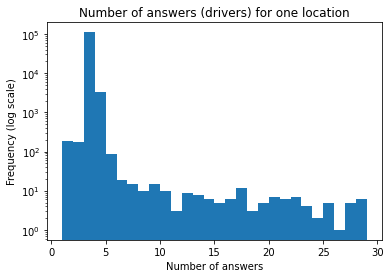

In [88]:
plt.hist(lengths, bins=range(1,30))
plt.yscale('log')
plt.xlabel("Number of answers")
plt.ylabel("Frequency (log scale)")
plt.title("Number of answers (drivers) for one location")

In the next step, I want to know, how much variance there tends to be within a group?

In [89]:
max_votes = []

for name, group in main_driver.groupby(main_driver.wkb):

    # If there is only one answer, no measure of variance possible
    if group.shape[0] == 1:
        continue

    answers_total = group.shape[0]
    categories, counts = np.unique(group.answer, return_counts=True)

    # How many votes out of the total number of votes did the class with most votes get?
    votes = counts.max()/answers_total
    max_votes.append(votes)



(array([7.1000e+01, 9.4480e+03, 3.9000e+01, 1.1580e+03, 7.0000e+01,
        4.6349e+04, 1.1840e+03, 7.1000e+01, 7.4000e+01, 5.5783e+04]),
 array([0.25 , 0.325, 0.4  , 0.475, 0.55 , 0.625, 0.7  , 0.775, 0.85 ,
        0.925, 1.   ]),
 <BarContainer object of 10 artists>)

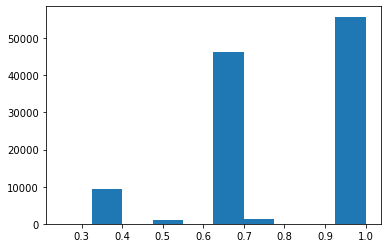

In [96]:
plt.hist(max_votes)
#plt.xlabel("Number of answers")
#plt.ylabel("Frequency (log scale)")
#plt.title("Number of answers (drivers) for one location")

In [99]:
count = 0
total_answers = 0

for name, group in main_driver.groupby(main_driver.wkb):

    # If there is only one answer, no measure of variance possible
    if group.shape[0] != 3:
        continue

    count += 1

    
    answers = np.unique(group.answer, return_counts=False).shape[0]
    total_answers += answers


#The average number of different labels when there are 3 
print(total_answers/count)



1.5912516665003946


## Processing labels

Here, I take the dataset csv and produce a DataFrame where each row is one location (sampleid). Columns are all possible answers and row value is the count of that answer (how many volunteers classified given location as a particular driver)




In [4]:
def get_answers_dict(group, step):

    if step != 'step1':
        raise NotImplementedError("step2 not implemented yet, need to add the dictionary here")

    rows_for_chosen_step = group.loc[group.step == step]

    answers = {
        'Subsistence agriculture': 0,
        'Managed forest/forestry': 0,
        'Pasture': 0,
        'Roads/trails/buildings': 0,
        'Other natural disturbances/No tree-loss driver': 0,
        'Commercial agriculture': 0,
        'Wildfire (disturbance)': 0,
        'Commercial oil palm or other palm plantations': 0,
        'Mining and crude oil extraction': 0
    }      

    for answer in rows_for_chosen_step.answer:
        answers[answer] += 1

    return answers


In [13]:
answers_list = []

count = 0
for idx, group in campaign.groupby('sampleid'):
    count+=1
    if count > 5:
        break
    step1_answers = get_answers_dict(group, 'step1')
    step1_answers['sampleid'] = group.sampleid.values[0]

    answers_list.append(step1_answers)
    print(idx)
    print(group[['userid', 'sampleid', 'step', 'answer', 'comments']])
    print(step1_answers)
    print('\n\n')


df_answers = pd.DataFrame(answers_list)



1588043
       userid  sampleid   step                   answer comments
13010   13817   1588043  step1  Subsistence agriculture      NaN
13011   13817   1588043  step3                      Yes      NaN
13012   13817   1588043  step2   Roads/trails/buildings      NaN
13013   15338   1588043  step1  Managed forest/forestry      NaN
13014   15338   1588043  step3                      Yes      NaN
13015   15338   1588043  step2   Roads/trails/buildings      NaN
13016   21907   1588043  step3                      Yes      NaN
13017   21907   1588043  step1  Managed forest/forestry      NaN
13018   21907   1588043  step2   Roads/trails/buildings      NaN
{'Subsistence agriculture': 1, 'Managed forest/forestry': 2, 'Pasture': 0, 'Roads/trails/buildings': 0, 'Other natural disturbances/No tree-loss driver': 0, 'Commercial agriculture': 0, 'Wildfire (disturbance)': 0, 'Commercial oil palm or other palm plantations': 0, 'Mining and crude oil extraction': 0, 'sampleid': 1588043}



1588045
     

Index(['userid', 'submissionid', 'timestamp', 'sampleid', 'skip', 'viewed_ge',
       'samplegroupid', 'used_basemap', 'submission_itemid', 'legendid',
       'step', 'name', 'answer', 'comm', 'comments', 'score_ctrl',
       'qual_score', 'rank_ini', 'rqs', 'addedpts', 'newqs', 'rank_final', 'x',
       'y'],
      dtype='object')

In [71]:
df_answers.to_csv("ILUC_controls_labels.csv")
df_answers2.to_csv("ILUC_campaign_labels.csv")